In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LogNorm
import pandas as pd
import statsmodels.api as sm

In [2]:
path0 = r'E:\netData\SciSciNet\2000-2015\paper2000-2015.tsv.zip'
path1 = r'E:\netData\SciSciNet\2000-2015\matchedNIH2000-2015.tsv.zip'
path2 = r'E:\netData\SciSciNet\2000-2015\matchedNSF2000-2015.tsv.zip'

In [3]:
df0 = pd.read_csv(path0)

C:\Users\nd\AppData\Local\Temp\ipykernel_19968\3385074289.py:1: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df0 = pd.read_csv(path0)


In [4]:
df0

,PaperID,Year,FieldID,JournalID,Reference_Count,C_f,C5,Team_Size,Disruption,Atyp_10pct_Z,...,Tweet,NCT,Institution_Count,NIH_Count,NSF_Count,Volume,Issue,NIH,NSF,PageLength
0,2789336,2008,33923547,204851967,13,0.072363,1,2,-0.001927,5.500000,...,0,0,1,0,0,0,0,0,0,4
1,191292197,2003,162324750,85146435,7,0.615370,6,1,0.028249,23.854084,...,0,0,1,0,0,105,1257,0,0,14
2,204935239,2003,71924100,13978405,13,0.812368,12,1,0.000000,6.597039,...,0,0,1,0,0,178,9,0,0,0
3,254201335,2004,127413603,13624874,14,1.084080,3,2,-0.000400,57.706944,...,0,0,1,0,0,49,1,0,0,3
4,273108480,2015,162324750,160393188,24,4.363288,23,1,-0.001233,21.198999,...,0,0,1,0,0,37,37,0,0,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18737863,2410441973,2014,71924100,2755924294,40,1.279841,12,3,0.002320,0.480196,...,0,0,1,0,0,56,4,0,0,9
18737864,2411860195,2014,71924100,2755060417,3,0.196899,2,3,0.037736,54.016285,...,0,0,1,0,0,93,8,0,0,1
18737865,19283373,2007,144024400,2764989208,5,0.999786,6,1,0.000000,226.953674,...,0,0,1,0,0,89,327,0,0,7
18737866,2798896096,2006,33923547,35440848,27,2.924278,28,3,-0.001645,0.639332,...,0,0,3,0,1,24,3,0,1,44


In [5]:
df0.columns

Index(['PaperID', 'Year', 'FieldID', 'JournalID', 'Reference_Count', 'C_f',
       'C5', 'Team_Size', 'Disruption', 'Atyp_10pct_Z', 'Atyp_Pairs',
       'Atyp_Median_Z', 'Patent_Count', 'Newsfeed_Count', 'Tweet_Count',
       'NCT_Count', 'Patent', 'Newsfeed', 'Tweet', 'NCT', 'Institution_Count',
       'NIH_Count', 'NSF_Count', 'Volume', 'Issue', 'NIH', 'NSF',
       'PageLength'],
      dtype='object')

# c

In [6]:
x_pos = [1,3,4,]
d1 = df0.loc[: , :]
d3 = df0.loc[df0['NIH']>0 , :]
d4 = df0.loc[df0['NSF']>0 , :]
colors = ["#212F3D","#196F3D","#1F618D"]

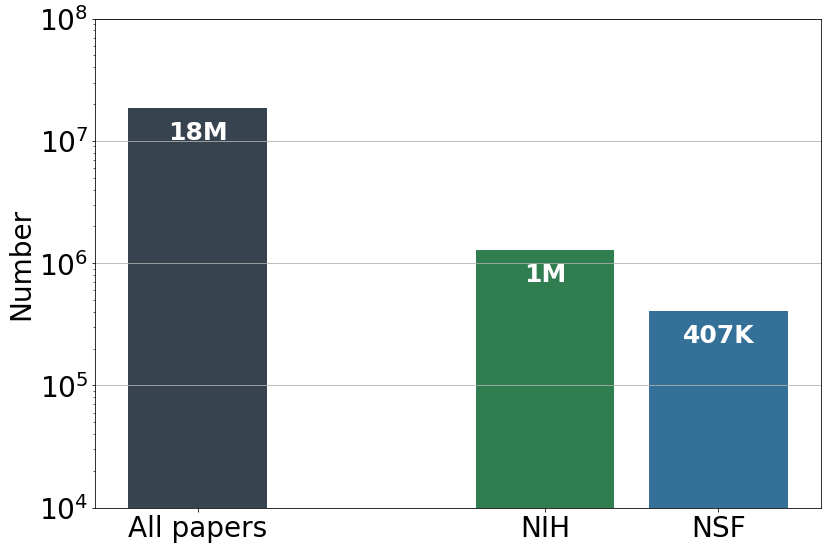

In [7]:
d = [len(d1) , len(d3) , len(d4)]

f, ax = plt.subplots(figsize=(13, 9))
plt.bar(x_pos, d,align='center', color= colors,alpha=0.9,capsize=10)
ax.yaxis.grid(True)
ax.set_yscale("log")
plt.xticks(x_pos,['All papers' , 'NIH' , 'NSF'],fontsize = 28)
for _ in range(len(d)):
    if d[_]>1000000:
        plt.text(x_pos[_],d[_]*0.55 , str(d[_]//1000000)+'M',fontsize = 25,c = 'white', ha='center', fontweight='bold')
    else:
        plt.text(x_pos[_],d[_]*0.55 , str(d[_]//1000)+'K',fontsize = 25,c = 'white', ha='center', fontweight='bold')
plt.yticks([10e3,10e4,10e5,10e6,10e7],size = 28)
plt.ylabel(r'Number',fontsize = 28)
plt.savefig(r"G:\A J YANG PAPER\All paper analysis\JIF Unveiling Funded Research Novelty and Disruptive Potential\figs\fig 1\c.pdf",bbox_inches = 'tight')

# d

In [21]:
year = range(2000,2016)
y0 = df0['NIH'].groupby(df0['Year']).count().values
y1 = df0['NIH'].groupby(df0['Year']).sum().values
y2 = df0['NSF'].groupby(df0['Year']).sum().values

In [22]:
markers = ['o','D','^']
labels = ['All papers' , 'NIH' , 'NSF']

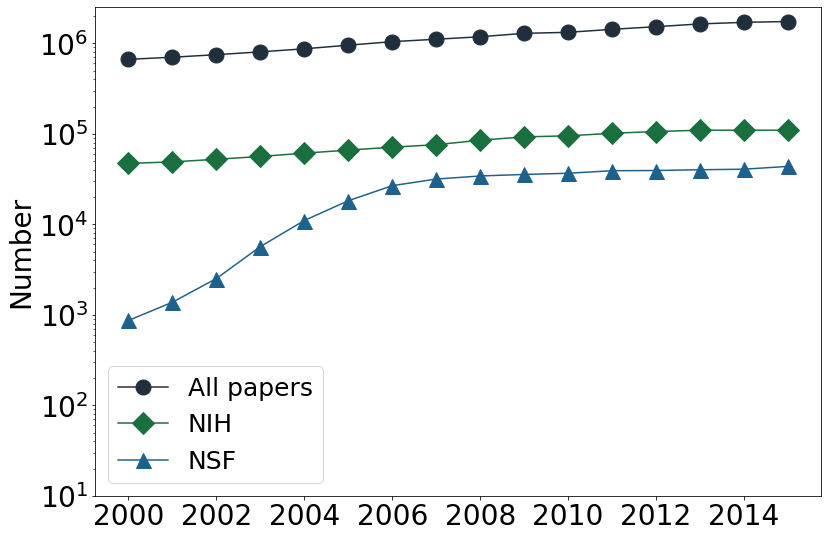

In [10]:
f, ax = plt.subplots(figsize=(13, 9))
for i in range(3):
    y = [y0,y1,y2][i]
    plt.plot(year , y , marker = markers[i], markersize = 15, label=labels[i], color=colors[i])
ax.set_yscale("log")
plt.legend(fontsize = 25 , loc = 'lower left')
plt.xticks(size = 28)
plt.yticks([10,100,1000,10000,100000,1000000],size = 28)
plt.ylabel(r'Number',fontsize = 28)
plt.savefig(r"G:\A J YANG PAPER\All paper analysis\JIF Unveiling Funded Research Novelty and Disruptive Potential\figs\fig 1\d1.pdf",bbox_inches = 'tight')

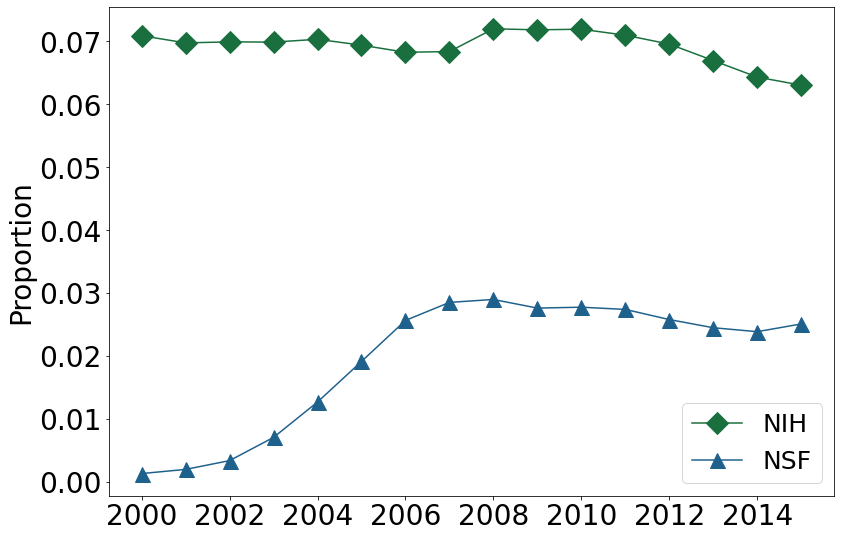

In [23]:
year = range(2000,2016)
y10 = y1/y0
y20 = y2/y0
f, ax = plt.subplots(figsize=(13, 9))
for i in range(2):
    y = [y10,y20][i]
    plt.plot(year , y , marker = markers[i+1], markersize = 15, label=labels[i+1], color=colors[i+1])

plt.legend(fontsize = 25 , loc = 'lower right')
plt.xticks(size = 28)
plt.yticks(size = 28)
plt.ylabel(r'Proportion',fontsize = 28)
plt.savefig(r"G:\A J YANG PAPER\All paper analysis\JIF Unveiling Funded Research Novelty and Disruptive Potential\figs\fig 1\d2.pdf",bbox_inches = 'tight')

# a

In [12]:
dfField = pd.read_csv(r'E:\netData\SciSciNet\data\SciSciNet_Fields.tsv' , sep = '\t')

In [13]:
dfField = dfField[dfField['Field_Type']!='Sub']

In [14]:
dfField

,FieldID,Field_Name,Field_Type
8,95457728,History,Top
11,127313418,Geology,Top
29,162324750,Economics,Top
53,205649164,Geography,Top
76,185592680,Chemistry,Top
83,138885662,Philosophy,Top
86,144024400,Sociology,Top
87,192562407,Materials science,Top
96,33923547,Mathematics,Top
107,86803240,Biology,Top


In [15]:
Fieldlst = dfField['FieldID'].values

In [16]:
data1 = []
data2 = []
year = range(2000,2016)
for Field in Fieldlst:
    df1 = df0.loc[df0['FieldID'] == Field,:].copy()
    y0 = df1['NIH'].groupby(df1['Year']).count().values
    y1 = df1['NIH'].groupby(df1['Year']).sum().values
    y2 = df1['NSF'].groupby(df1['Year']).sum().values
    y10 = y1/y0
    y20 = y2/y0
    data1.append(y10)
    data2.append(y20)

In [17]:
dd1 = pd.DataFrame(data1 , columns=year , index = dfField['Field_Name'].values)
dd2 = pd.DataFrame(data2 , columns=year , index = dfField['Field_Name'].values)

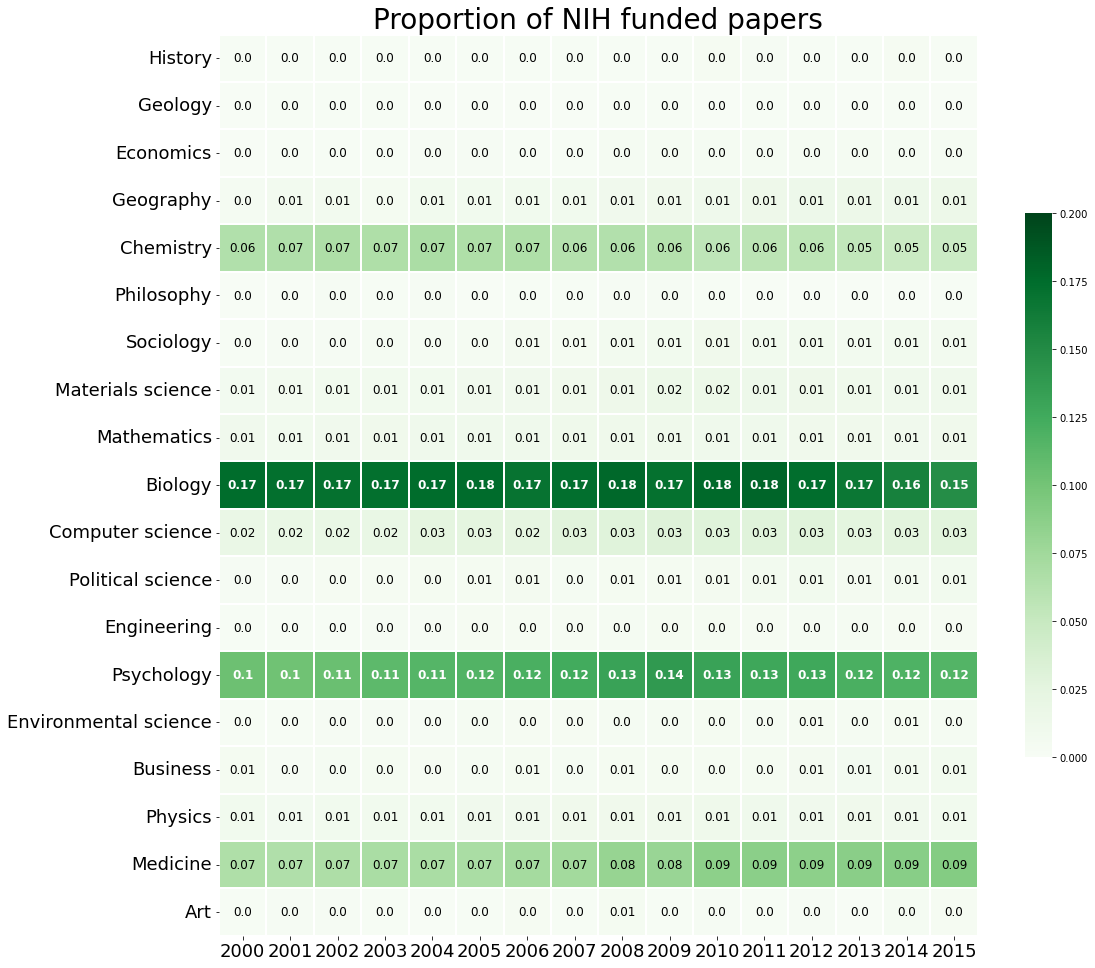

In [18]:
fig, ax = plt.subplots(figsize=(17, 20))
ax.set_title("Proportion of NIH funded papers", fontsize=28)

cmap = sns.color_palette('Greens', as_cmap=True)
heatmap = sns.heatmap(data=dd1, cmap=cmap, vmin=0, vmax=0.2,
                      square=True, linewidths=1.5, cbar_kws={"shrink": .5})
ax.tick_params(labelsize=18)
# Add data labels
for i in range(len(dd1)):
    for j in range(len(dd1.columns)):
        if dd1.iloc[i, j]<0.0955:
            text = ax.text(j + 0.5, i + 0.5, round(dd1.iloc[i, j], 2),
                           ha="center", va="center", color="black", fontsize=12)
        else:
            text = ax.text(j + 0.5, i + 0.5, round(dd1.iloc[i, j], 2),
                           ha="center", va="center", color="white", fontsize=12, fontweight='bold')

plt.savefig(r"G:\A J YANG PAPER\All paper analysis\JIF Unveiling Funded Research Novelty and Disruptive Potential\figs\fig 1\a.pdf",bbox_inches = 'tight')

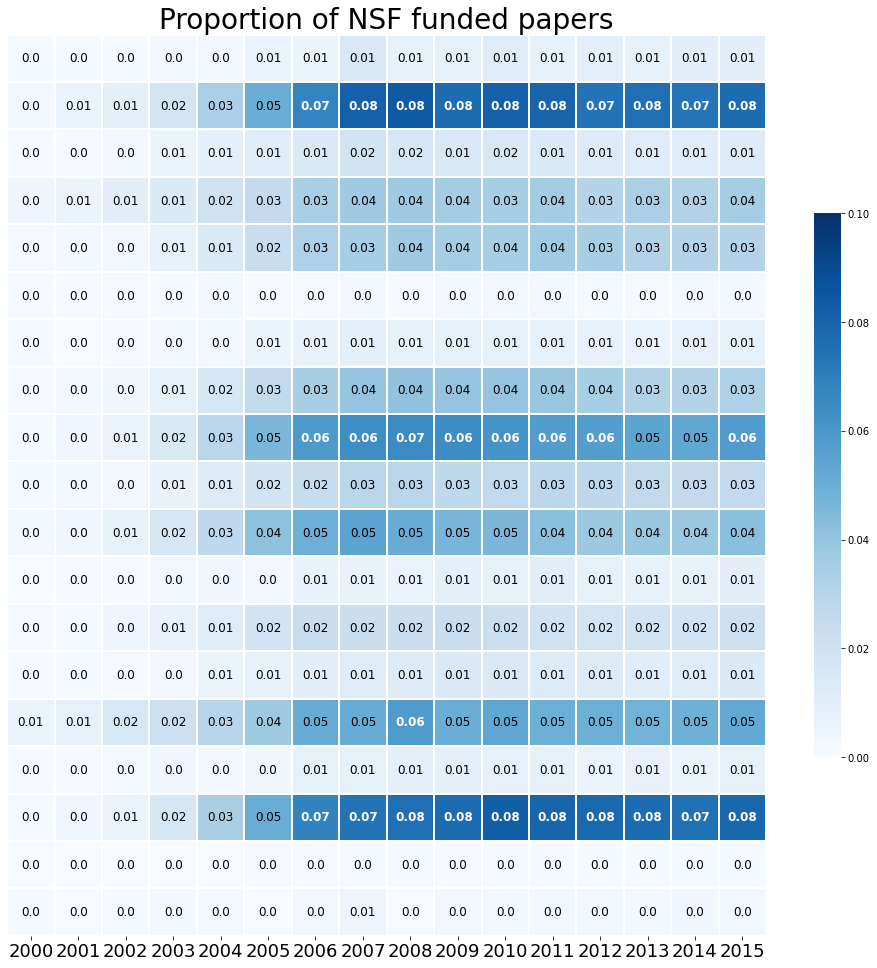

In [19]:
fig, ax = plt.subplots(figsize=(17, 20))
ax.set_title("Proportion of NSF funded papers", fontsize=28)

cmap = sns.color_palette('Blues', as_cmap=True)
heatmap = sns.heatmap(data=dd2, cmap=cmap, vmin=0, vmax=0.1,
                      square=True, linewidths=1.5, cbar_kws={"shrink": .5})
ax.tick_params(labelsize=18)
heatmap.set_yticks([])
# Add data labels
for i in range(len(dd2)):
    for j in range(len(dd2.columns)):
        if dd2.iloc[i, j]<0.055:
            text = ax.text(j + 0.5, i + 0.5, round(dd2.iloc[i, j], 2),
                           ha="center", va="center", color="black", fontsize=12)
        else:
            text = ax.text(j + 0.5, i + 0.5, round(dd2.iloc[i, j], 2),
                           ha="center", va="center", color="white", fontsize=12, fontweight='bold')

plt.savefig(r"G:\A J YANG PAPER\All paper analysis\JIF Unveiling Funded Research Novelty and Disruptive Potential\figs\fig 1\b.pdf",bbox_inches = 'tight')

# d

In [3]:
df1 = pd.read_csv(path1)
df2 = pd.read_csv(path2)

C:\Users\nd\AppData\Local\Temp\ipykernel_25624\297883942.py:1: DtypeWarning: Columns (26,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(path1)


In [4]:
df1

,PaperID,Year,FieldID,JournalID,Reference_Count,C_f,C5,Team_Size,Disruption,Atyp_10pct_Z,...,Institution_Count,NIH_Count,NSF_Count,Volume,Issue,FirstPage,LastPage,NIH,NSF,PageLength
0,1816482797,2015,86803240,166515463,29,1.305137,15,7,0.000106,-4.246876,...,3,1,0,24,21,5995,6002,1,0,7
1,1824457652,2015,86803240,166515463,65,3.371604,50,21,-0.004329,-7.690156,...,5,0,0,24,21,5965,5976,0,0,11
2,1893201598,2015,86803240,166515463,28,3.534746,52,11,-0.007772,19.962751,...,3,0,0,24,21,5977,5984,0,0,7
3,1875600228,2015,86803240,166515463,40,0.815711,14,8,-0.000523,-6.721229,...,2,2,0,24,21,6093,6105,1,0,12
4,1503301128,2015,86803240,166515463,67,2.283990,35,10,-0.000589,-0.049458,...,3,0,0,24,21,6066,6079,0,0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5546780,2165646896,2004,86803240,145090216,17,0.244307,9,3,0.000314,3.186190,...,1,0,0,36,4,250,258,0,0,8
5546781,2156997304,2004,86803240,145090216,16,0.510824,8,4,-0.001564,85.732503,...,1,0,0,36,4,284,289,0,0,5
5546782,2104663756,2004,86803240,145090216,18,0.333146,8,3,-0.002029,-3.352016,...,1,0,0,36,4,269,276,0,0,7
5546783,2131685436,2004,86803240,145090216,47,0.111049,4,4,-0.001212,10.599674,...,1,0,0,36,4,243,249,0,0,6


In [5]:
df2

,PaperID,Year,FieldID,JournalID,Reference_Count,C_f,C5,Team_Size,Disruption,Atyp_10pct_Z,...,Institution_Count,NIH_Count,NSF_Count,Volume,Issue,FirstPage,LastPage,NIH,NSF,PageLength
0,305584680,2015,185592680,133942674,38,1.380257,18,4,-0.007126,9.592317,...,1,0,1,56,27,4060,4062,0,1,2
1,2952876529,2015,185592680,133942674,44,1.248804,18,5,-0.004666,-92.831876,...,1,0,0,56,27,4080,4083,0,0,3
2,245651248,2015,185592680,133942674,29,0.591539,9,5,-0.002064,-49.824443,...,1,0,0,56,27,4128,4130,0,0,2
3,2949265031,2015,185592680,133942674,26,0.328633,4,6,-0.000893,105.086685,...,2,0,0,56,27,4057,4059,0,0,2
4,2949360656,2015,185592680,133942674,14,0.788718,12,6,-0.004751,183.165070,...,2,0,1,56,27,4124,4127,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3515351,1635102558,2014,41008148,167961193,20,5.829641,33,2,-0.000005,-14.961206,...,1,1,1,59,13,1,21,1,1,20
3515352,2108135219,2015,41008148,113186628,19,1.271396,11,8,0.000189,-12.289726,...,2,0,2,2015,0,9,19,0,1,10
3515353,2322633382,2011,41008148,2764728784,24,0.296989,2,2,0.000292,42.265078,...,1,0,1,1,2,211,224,0,1,13
3515354,2419668291,2012,192562407,2764826640,13,2.802475,28,2,-0.005609,11.383161,...,1,0,1,819,0,393,404,0,1,11


In [4]:
x_pos = [1,2,4,5]
d1 = df1[df1['NIH']==0]
d2 = df1[df1['NIH']!=0]
d4 = df1[df1['NSF']==0]
d5 = df1[df1['NSF']!=0]
colors = ["#922B21","#196F3D","#922B21","#1F618D"]

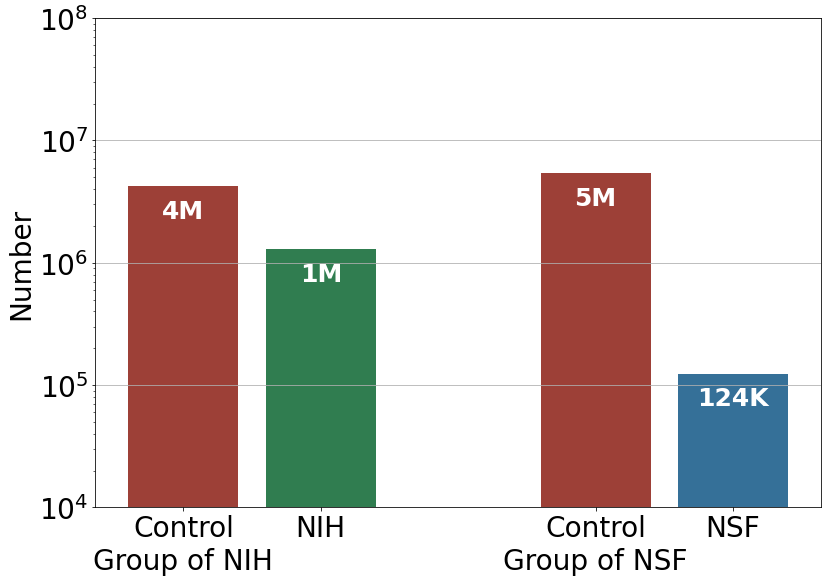

In [10]:
d = [len(d1),len(d2) , len(d4) , len(d5)]

f, ax = plt.subplots(figsize=(13, 9))
plt.bar(x_pos, d,align='center', color= colors,alpha=0.9,capsize=10)
ax.yaxis.grid(True)
ax.set_yscale("log")
plt.xticks(x_pos,['Control\nGroup of NIH' , 'NIH' ,'Control\nGroup of NSF', 'NSF'],fontsize = 28)
for _ in range(len(d)):
    if d[_]>1000000:
        plt.text(x_pos[_],d[_]*0.55 , str(d[_]//1000000)+'M',fontsize = 25,c = 'white', ha='center', fontweight='bold')
    else:
        plt.text(x_pos[_],d[_]*0.55 , str(d[_]//1000)+'K',fontsize = 25,c = 'white', ha='center', fontweight='bold')
plt.yticks([10e3,10e4,10e5,10e6,10e7],size = 28)
plt.ylabel(r'Number',fontsize = 28)
plt.savefig(r"G:\A J YANG PAPER\All paper analysis\JIF Unveiling Funded Research Novelty and Disruptive Potential\figs\fig 1\g.pdf",bbox_inches = 'tight')